In [1]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Spliiting data into test and train sets
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(df.drop('koi_disposition', axis=1), df['koi_disposition'], test_size=0.20, random_state=0)

In [4]:
model_f = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
model_f.fit(X_train_f, y_train_f)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [5]:
# plotting feature importances
features = df.drop('koi_disposition', axis=1).columns
importances = model_f.feature_importances_
indices = np.argsort(importances)

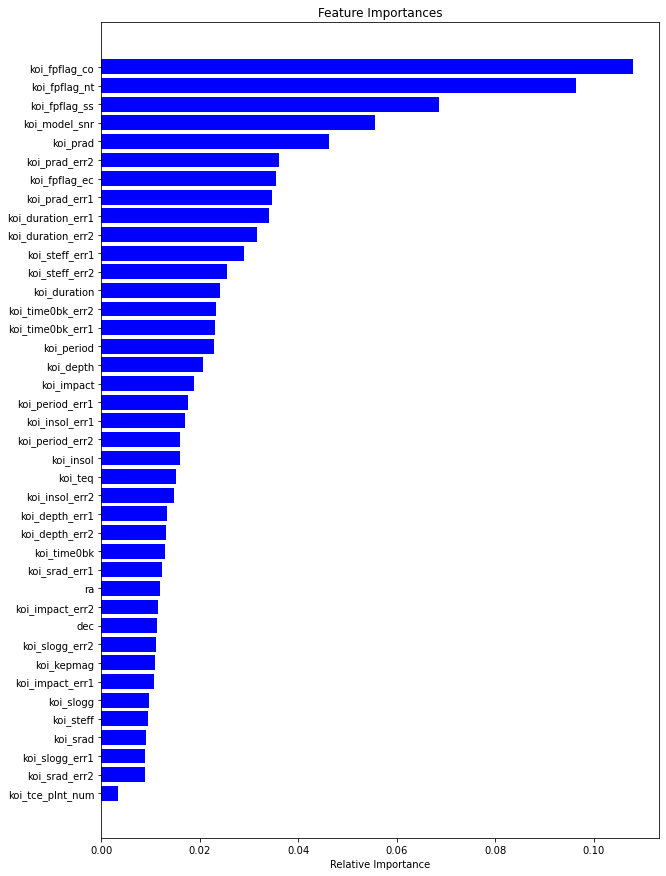

In [6]:
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Select your features (columns)

In [7]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_disposition','koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co','koi_model_snr','koi_prad']]


# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
X = selected_features.drop("koi_disposition", axis=1)
y = selected_features["koi_disposition"]
print(X.shape, y.shape)

(6991, 5) (6991,)


In [9]:
# Spliting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
y_train.head()

3563    CANDIDATE
4099    CONFIRMED
5460    CANDIDATE
1091    CONFIRMED
5999    CANDIDATE
Name: koi_disposition, dtype: object

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)

In [11]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [13]:
y_train = np.array(y_train)
y_test = np.array(y_test)

label_encoder = LabelEncoder()
vec_y_train = label_encoder.fit_transform(y_train)
vec_y_test = label_encoder.fit_transform(y_test)

In [14]:
# One-hot encoding
y_train_categorical = to_categorical(vec_y_train)
y_test_categorical = to_categorical(vec_y_test)
y_test_categorical

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [15]:
# Create the GridSearchCV model
# Support vector machine linear classifier
from sklearn.svm import SVC 
model_tuned = SVC(kernel='linear')


In [16]:
# Train the model with GridSearch
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model_tuned, param_grid, verbose=3)

In [17]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..............................C=1, gamma=0.0001; total time=   2.9s
[CV 2/5] END ..............................C=1, gamma=0.0001; total time=   1.9s
[CV 3/5] END ..............................C=1, gamma=0.0001; total time=   2.1s
[CV 4/5] END ..............................C=1, gamma=0.0001; total time=   1.7s
[CV 5/5] END ..............................C=1, gamma=0.0001; total time=   1.6s
[CV 1/5] END ...............................C=1, gamma=0.001; total time=   1.8s
[CV 2/5] END ...............................C=1, gamma=0.001; total time=   1.7s
[CV 3/5] END ...............................C=1, gamma=0.001; total time=   1.8s
[CV 4/5] END ...............................C=1, gamma=0.001; total time=   2.1s
[CV 5/5] END ...............................C=1, gamma=0.001; total time=   1.7s
[CV 1/5] END ................................C=1, gamma=0.01; total time=   1.7s
[CV 2/5] END ................................C=1,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=3)

In [18]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001}
0.7354568873299907


In [19]:
predictions = grid.predict(X_test_scaled)

In [20]:
print('Test Acc: %.3f' % grid.score(X_test_scaled, y_test))

Test Acc: 0.751


In [21]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["CANDIDATE","CONFIRMED","FALSE POSITIVE"]))

                precision    recall  f1-score   support

     CANDIDATE       0.00      0.00      0.00       404
     CONFIRMED       0.50      0.98      0.66       435
FALSE POSITIVE       0.99      0.97      0.98       909

      accuracy                           0.75      1748
     macro avg       0.50      0.65      0.55      1748
  weighted avg       0.64      0.75      0.68      1748



/opt/anaconda3/envs/PythonAdv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/PythonAdv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/PythonAdv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)